# Applied Machine Learning Project: Recommender System
## By: Cornelius Mellino Sarungu

## 1. Preparation
Import all necessary librares.

In [2]:
# Import library
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt
import math

## 2. Define the Data URL
Set the data URL and load them.

In [22]:
_data_url = 'https://raw.githubusercontent.com/cornelius-mellino/laporan-mlt-main/master/data/'
_file_movies = 'movies.csv'
_file_rating = 'Ratings.csv'

In [23]:
movies = pd.read_csv(_data_url + _file_movies)
rating = pd.read_csv(_data_url + _file_rating)

## 3. Data Understanding
Get into the data structure to understand more about it. In this stage we conduct some inspection steps and also resizing the dataset to gain the processing speed and avoid crash caused by the overloaded memory. The resizing won't affect the model because it works based on a simple algebraic calculation, unlike those which based on neural network that really depends on the data size.

## 3.1 Inspecting the movies dataframe.

### 3.1.1 Inspect part of the movies dataframe using head() function.

In [24]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### 3.1.2 Check the original length of the movies dataframe.

In [25]:
len(movies)

9742

### 3.1.3 Inspect the movies dataframe datastructure using info() function.

In [26]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


### 3.1.4 For the experiment, cut the data to only 5000 rows to speed up the experiment process. (optional)

In [8]:
movies = movies[:5000]

### 3.1.5 Checkout the total unique movies in the movies dataframe.

In [27]:
len(movies['title'].unique())

9737

## 3.2 Inspecting the rating dataframe.

### 3.2.1 Inspect part of the rating dataframe using head() function.

In [28]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### 3.2.2 Inspect the rating portion on movies.

<Axes: ylabel='movieId'>

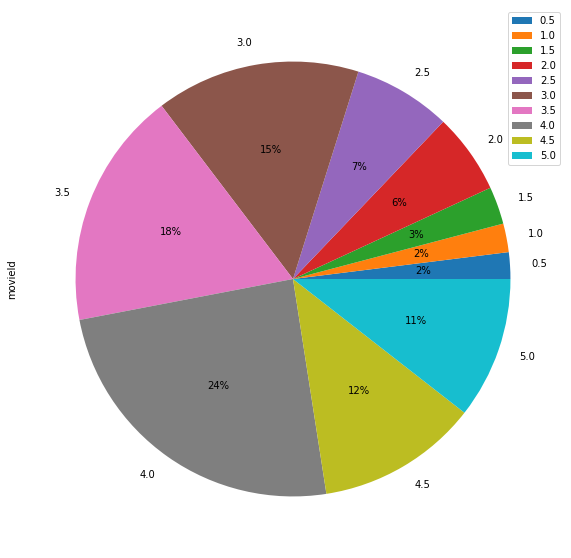

In [29]:
rating.groupby(['rating']).sum().plot(kind='pie', y="movieId", autopct='%1.0f%%', figsize=(10, 10))

### 3.2.3 Inspect the rating portion on users.

<Axes: ylabel='userId'>

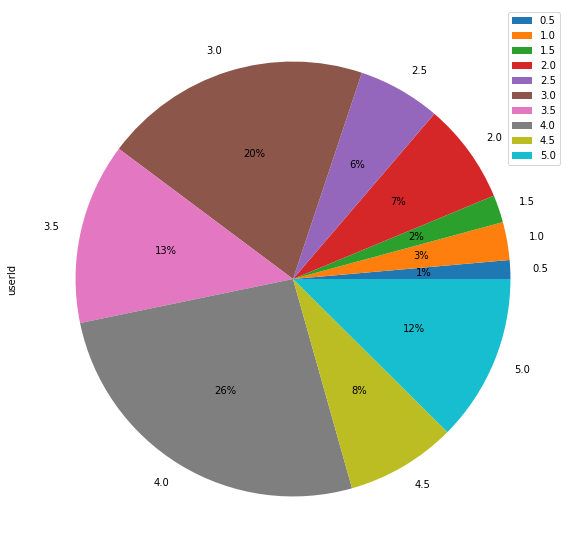

In [30]:
rating.groupby(['rating']).sum().plot(kind='pie', y="userId", autopct='%1.0f%%', figsize=(10, 10))

### 3.2.4 Top 20 users with highest count of movies watched.

In [31]:
rating.groupby(['userId'], group_keys=False).count().sort_values(by="movieId", ascending=False)["movieId"][:20]

userId
414    2698
599    2478
474    2108
448    1864
274    1346
610    1302
68     1260
380    1218
606    1115
288    1055
249    1046
387    1027
182     977
307     975
603     943
298     939
177     904
318     879
232     862
480     836
Name: movieId, dtype: int64

### 3.2.5 Top 20 movies with highest count of users.

In [32]:
rating.groupby(['movieId'], group_keys=False).count().sort_values(by="userId", ascending=False)["userId"][:20]

movieId
356     329
318     317
296     307
593     279
2571    278
260     251
480     238
110     237
589     224
527     220
2959    218
1       215
1196    211
50      204
2858    204
47      203
780     202
150     201
1198    200
4993    198
Name: userId, dtype: int64

### 3.2.6 Check the original length of the rating dataframe.

In [33]:
len(rating)

100836

### 3.2.7 Check the original unique user in the rating dataframe.

In [34]:
len(rating['userId'].unique())

610

### 3.2.8 Check the original unique movies in the rating dataframe.

In [35]:
len(rating['movieId'].unique())

9724

### 3.2.9 For the experiment reduce the data size to 10000 to increase processing speed.

In [36]:
rating = rating[:10000]

### 3.2.10 Inspect the total unique user involved in the newly reduced rating dataframe.

In [37]:
len(rating['userId'].unique())

66

### 3.2.11 Inspect the total unique movies involved in the newly reduced rating dataframe.

In [38]:
len(rating['movieId'].unique())

3218

### 3.2.12 Reinspect the rating portion on users.

<Axes: ylabel='userId'>

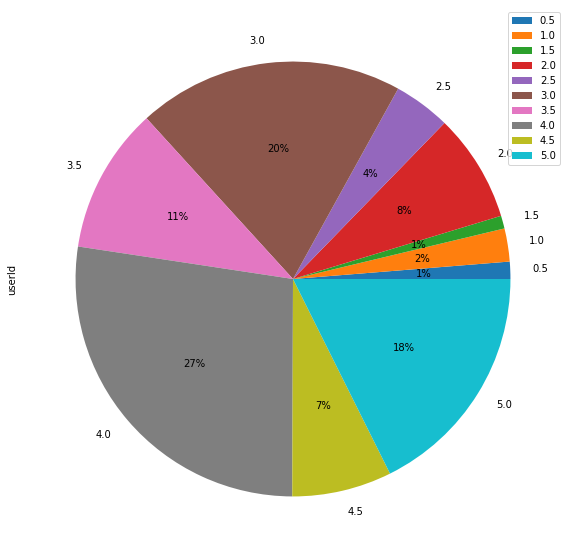

In [39]:
rating.groupby(['rating']).sum().plot(kind='pie', y="userId", autopct='%1.0f%%', figsize=(10, 10))

### 3.2.13 Reinspect the rating portion on movies.

<Axes: ylabel='movieId'>

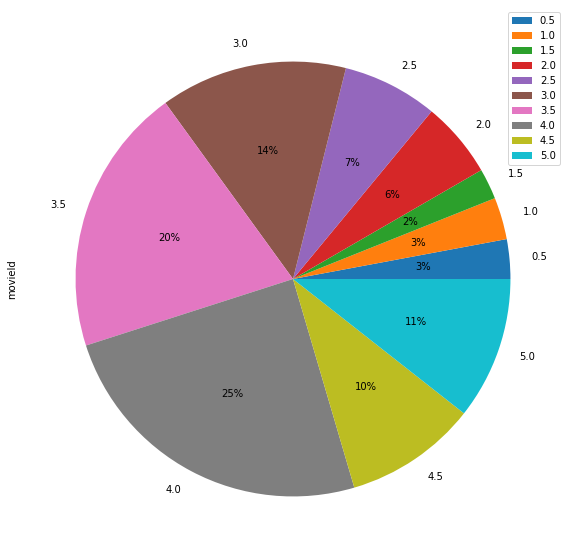

In [40]:
rating.groupby(['rating']).sum().plot(kind='pie', y="movieId", autopct='%1.0f%%', figsize=(10, 10))

### 3.2.14 Rating data structure inspection

In [41]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     10000 non-null  int64  
 1   movieId    10000 non-null  int64  
 2   rating     10000 non-null  float64
 3   timestamp  10000 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 312.6 KB


## 3.3 Re-inspect the total number of users, movies and ratings.

In [42]:
# Mendapatkan jumlah user
num_users = len(rating["userId"].unique())
print(num_users)
 
# Mendapatkan jumlah movie
num_movie = len(rating["movieId"].unique())
print(num_movie)

# Mendapatkan jumlah rating
num_rating = len(rating["rating"])
print(num_rating)
 
# Nilai minimum rating
min_rating = min(rating['rating'])
 
# Nilai maksimal rating
max_rating = max(rating['rating'])
 
print('Number of User: {}, Number of Movie: {}, Number of Rating: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, num_rating, min_rating, max_rating
))

66
3218
10000
Number of User: 66, Number of Movie: 3218, Number of Rating: 10000, Min Rating: 0.5, Max Rating: 5.0


## 4. Data Preparation
Data must be prepared, and tidy up before processed into an analytic engine or algorithm. In this stage we do the transformation effort to shape the data into a ready-to-process form.

## 4.1 Check the data structure.

In [44]:
print(rating.head())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [45]:
print(movies.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [46]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     10000 non-null  int64  
 1   movieId    10000 non-null  int64  
 2   rating     10000 non-null  float64
 3   timestamp  10000 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 312.6 KB


In [47]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


## 4.2 Merge the rating and movie tables.

### 4.2.1 Merge the tables.

In [48]:
complete_df = pd.merge(rating, movies, how='inner', left_on = 'movieId', right_on = 'movieId')

In [49]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     10000 non-null  int64  
 1   movieId    10000 non-null  int64  
 2   rating     10000 non-null  float64
 3   timestamp  10000 non-null  int64  
 4   title      10000 non-null  object 
 5   genres     10000 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 546.9+ KB


In [50]:
complete_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


### 4.2.2 Check whether there are any duplicate data or not.

In [51]:
complete_df["duplicate"] = complete_df.duplicated()
print(len(complete_df[complete_df["duplicate"] == False]))
print(len(complete_df[complete_df["duplicate"] == True]))

10000
0


### 4.2.3 Check whether there are any missing values.

In [52]:
# Cek missing value dengan fungsi isnull()
complete_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
duplicate    0
dtype: int64

In [53]:
complete_df["rating"].isnull().values.any()

False

## 4.3 Test to find out the total rating per movie.

In [54]:
# Menghitung jumlah rating per movie
total_rating_per_movie_df = rating.groupby('movieId').sum()[["rating"]]
total_rating_per_movie_df = total_rating_per_movie_df.reset_index()
print(total_rating_per_movie_df.head())

   movieId  rating
0        1    90.5
1        2    33.0
2        3    37.5
3        4     6.0
4        5    24.0


# 5. Model Building.

## 5.1 Build method for calculating the Euclidian Distance.

In [55]:
# Calculate the euclidean distance

def movie_euclidian_distance(dataset, user1, user2):
  data1 = dataset[dataset["userId"] == user1][["userId", "movieId", "rating"]]
  data2 = dataset[dataset["userId"] == user2][["userId", "movieId", "rating"]]

  similar_movie = pd.merge(dataset[dataset["userId"] == user1][["userId", "movieId", "rating"]], dataset[dataset["userId"] == user2][["userId", "movieId", "rating"]], on=['movieId'], how='inner')

  similar_movie["difference"] = similar_movie["rating_x"] - similar_movie["rating_y"]
  similar_movie["sqr_distance"] = similar_movie["difference"] * similar_movie["difference"]

  sum_euclidian = sum(similar_movie["sqr_distance"])

  return 1 / (1 + math.sqrt(sum_euclidian))

## 5.2 Build method for calculating similarities score.

In [56]:
from datetime import datetime

def get_similarities(dataset, user):
  user_taken_out_df = dataset[dataset["userId"] != user]["userId"].unique()

  #now = datetime.now()
  #current_time = now.strftime("%H:%M:%S")

  similarity = [(movie_euclidian_distance(dataset, user, other), other) for other in user_taken_out_df if other != user]

  #now = datetime.now()
  #current_time = now.strftime("%H:%M:%S")

  similarity.sort()
  similarity.reverse()
  
  return pd.DataFrame (similarity, columns = ['similarity', 'userId'])

### 5.2.1 Testing the get_similarities() method.

In [57]:
similarity_list = get_similarities(complete_df, 5)

print(similarity_list)

    similarity  userId
0     1.000000      55
1     1.000000      53
2     1.000000      48
3     1.000000      25
4     1.000000      13
..         ...     ...
60    0.135078      58
61    0.135078      46
62    0.135078      40
63    0.129732      43
64    0.106762       6

[65 rows x 2 columns]


## 5.3 Build method to get the recommendation list for a user.

In [58]:
def get_recommendation(dataset, user):
  similarity_temp_df = pd.DataFrame()
  movie_temp_df = pd.DataFrame()

  similarity_list = get_similarities(dataset, user)

  for row in dataset.index:

    if(dataset["userId"][row] == user):
      continue
    else:
      similarity_temp_df = similarity_temp_df.append( 
          {"userId": dataset["userId"][row], 
           "movieId": dataset["movieId"][row],
           "rating": dataset["rating"][row], 
           "similarity": similarity_list[similarity_list["userId"] == dataset["userId"][row]][["similarity"]].values[0][0],
           "similarity_x_rating": dataset["rating"][row] * similarity_list[similarity_list["userId"] == dataset["userId"][row]][["similarity"]].values[0][0]},
           ignore_index=True)

  movie_temp_df = similarity_temp_df.groupby("movieId").sum()[["similarity", "similarity_x_rating"]]
  movie_temp_df["score_per_movie"] = movie_temp_df["similarity_x_rating"] / movie_temp_df["similarity"]
  movie_temp_df.sort_values(by=["score_per_movie"], inplace=True, ascending=False)

  movie_temp_df.reset_index(inplace=True)
  movie_temp_df["title"] = ""

  for i in movie_temp_df.index:
    movie_temp_df.loc[i:, ["title"]] = dataset[dataset["movieId"] == movie_temp_df.loc[i:, ["movieId"]].values[0][0]][["title"]].values[0][0]
  #  print(movie_temp_df)
  
  return movie_temp_df


### 5.2.2 Testing the get_recommendation() method.

In [59]:
print(get_recommendation(complete_df, 100)[1:10])

Streaming output truncated to the last 5000 lines.
<ipython-input-58-0d8c0b0674e4>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similarity_temp_df = similarity_temp_df.append(
<ipython-input-58-0d8c0b0674e4>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similarity_temp_df = similarity_temp_df.append(
<ipython-input-58-0d8c0b0674e4>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similarity_temp_df = similarity_temp_df.append(
<ipython-input-58-0d8c0b0674e4>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similarity_temp_df = similarity_temp_df.append(
<ipython-input-58-0d8c0b0674e4>:12: FutureWarning: The frame.append metho

   movieId  similarity  similarity_x_rating  score_per_movie  \
1   1105.0         1.0                  5.0              5.0   
2   5500.0         1.0                  5.0              5.0   
3   5690.0         1.0                  5.0              5.0   
4  98491.0         1.0                  5.0              5.0   
5   5746.0         1.0                  5.0              5.0   
6  96821.0         2.0                 10.0              5.0   
7   1235.0         1.0                  5.0              5.0   
8   5919.0         1.0                  5.0              5.0   
9   1151.0         1.0                  5.0              5.0   

                                            title  
1   Children of the Corn IV: The Gathering (1996)  
2                              Top Secret! (1984)  
3  Grave of the Fireflies (Hotaru no haka) (1988)  
4                                 Paperman (2012)  
5                 Galaxy of Terror (Quest) (1981)  
6         Perks of Being a Wallflower, The (201

# 6. Evaluation.

## 6.1 Processing time measurement.
First attempt, extracting top 10 result.

In [61]:
now1 = datetime.now()
t1 = now1.strftime("%H:%M:%S")
print("Start time: ", t1)

print(get_recommendation(complete_df, 100)[1:10])

now2 = datetime.now()
t2 = now2.strftime("%H:%M:%S")
# datetime.strptime
print("Finish time: ", t2)

delta = (now2-now1).total_seconds()
print("Processing duration: {} sec.".format(delta))

Start time:  00:55:48


Streaming output truncated to the last 5000 lines.
<ipython-input-58-0d8c0b0674e4>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similarity_temp_df = similarity_temp_df.append(
<ipython-input-58-0d8c0b0674e4>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similarity_temp_df = similarity_temp_df.append(
<ipython-input-58-0d8c0b0674e4>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similarity_temp_df = similarity_temp_df.append(
<ipython-input-58-0d8c0b0674e4>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similarity_temp_df = similarity_temp_df.append(
<ipython-input-58-0d8c0b0674e4>:12: FutureWarning: The frame.append metho

   movieId  similarity  similarity_x_rating  score_per_movie  \
1   1105.0         1.0                  5.0              5.0   
2   5500.0         1.0                  5.0              5.0   
3   5690.0         1.0                  5.0              5.0   
4  98491.0         1.0                  5.0              5.0   
5   5746.0         1.0                  5.0              5.0   
6  96821.0         2.0                 10.0              5.0   
7   1235.0         1.0                  5.0              5.0   
8   5919.0         1.0                  5.0              5.0   
9   1151.0         1.0                  5.0              5.0   

                                            title  
1   Children of the Corn IV: The Gathering (1996)  
2                              Top Secret! (1984)  
3  Grave of the Fireflies (Hotaru no haka) (1988)  
4                                 Paperman (2012)  
5                 Galaxy of Terror (Quest) (1981)  
6         Perks of Being a Wallflower, The (201

Second attempt, extracting all of the result.

In [62]:
now1 = datetime.now()
t1 = now1.strftime("%H:%M:%S")
print("Start time: ", t1)

print(get_recommendation(complete_df, 100))

now2 = datetime.now()
t2 = now2.strftime("%H:%M:%S")
# datetime.strptime
print("Finish time: ", t2)

delta = (now2-now1).total_seconds()
print("Processing duration: {} sec.".format(delta))

Start time:  01:00:21


Streaming output truncated to the last 5000 lines.
<ipython-input-58-0d8c0b0674e4>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similarity_temp_df = similarity_temp_df.append(
<ipython-input-58-0d8c0b0674e4>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similarity_temp_df = similarity_temp_df.append(
<ipython-input-58-0d8c0b0674e4>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similarity_temp_df = similarity_temp_df.append(
<ipython-input-58-0d8c0b0674e4>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similarity_temp_df = similarity_temp_df.append(
<ipython-input-58-0d8c0b0674e4>:12: FutureWarning: The frame.append metho

       movieId  similarity  similarity_x_rating  score_per_movie  \
0       1284.0         2.0                 10.0              5.0   
1       1105.0         1.0                  5.0              5.0   
2       5500.0         1.0                  5.0              5.0   
3       5690.0         1.0                  5.0              5.0   
4      98491.0         1.0                  5.0              5.0   
...        ...         ...                  ...              ...   
3213    5048.0         1.0                  0.5              0.5   
3214  125916.0         1.0                  0.5              0.5   
3215    6238.0         1.0                  0.5              0.5   
3216  175485.0         1.0                  0.5              0.5   
3217    4821.0         1.0                  0.5              0.5   

                                               title  
0                              Big Sleep, The (1946)  
1      Children of the Corn IV: The Gathering (1996)  
2                 

Third attempt, testing with second user.

In [63]:
now1 = datetime.now()
t1 = now1.strftime("%H:%M:%S")
print("Start time: ", t1)

print(get_recommendation(complete_df, 5))

now2 = datetime.now()
t2 = now2.strftime("%H:%M:%S")
# datetime.strptime
print("Finish time: ", t2)

delta = (now2-now1).total_seconds()
print("Processing duration: {} sec.".format(delta))

Start time:  01:04:13


Streaming output truncated to the last 5000 lines.
<ipython-input-58-0d8c0b0674e4>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similarity_temp_df = similarity_temp_df.append(
<ipython-input-58-0d8c0b0674e4>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similarity_temp_df = similarity_temp_df.append(
<ipython-input-58-0d8c0b0674e4>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similarity_temp_df = similarity_temp_df.append(
<ipython-input-58-0d8c0b0674e4>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similarity_temp_df = similarity_temp_df.append(
<ipython-input-58-0d8c0b0674e4>:12: FutureWarning: The frame.append metho

       movieId  similarity  similarity_x_rating  score_per_movie  \
0       1298.0    1.395539             6.977695              5.0   
1       1284.0    0.428122             2.140608              5.0   
2       4482.0    0.175734             0.878670              5.0   
3       6763.0    0.247440             1.237201              5.0   
4       5181.0    0.181818             0.909091              5.0   
...        ...         ...                  ...              ...   
3212    6880.0    0.184642             0.092321              0.5   
3213  173307.0    0.289898             0.144949              0.5   
3214  135861.0    0.289898             0.144949              0.5   
3215   56171.0    0.309017             0.154508              0.5   
3216   86068.0    0.289898             0.144949              0.5   

                                                  title  
0                           Pink Floyd: The Wall (1982)  
1                                 Big Sleep, The (1946)  
2        

Fourth attempt, testing with third user.

In [64]:
now1 = datetime.now()
t1 = now1.strftime("%H:%M:%S")
print("Start time: ", t1)

print(get_recommendation(complete_df, 20))

now2 = datetime.now()
t2 = now2.strftime("%H:%M:%S")
# datetime.strptime
print("Finish time: ", t2)

delta = (now2-now1).total_seconds()
print("Processing duration: {} sec.".format(delta))

Start time:  01:07:46


Streaming output truncated to the last 5000 lines.
<ipython-input-58-0d8c0b0674e4>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similarity_temp_df = similarity_temp_df.append(
<ipython-input-58-0d8c0b0674e4>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similarity_temp_df = similarity_temp_df.append(
<ipython-input-58-0d8c0b0674e4>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similarity_temp_df = similarity_temp_df.append(
<ipython-input-58-0d8c0b0674e4>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similarity_temp_df = similarity_temp_df.append(
<ipython-input-58-0d8c0b0674e4>:12: FutureWarning: The frame.append metho

       movieId  similarity  similarity_x_rating  score_per_movie  \
0       6763.0    0.108152             0.540762              5.0   
1      87869.0    0.108152             0.540762              5.0   
2      47997.0    0.452399             2.261994              5.0   
3       7842.0    0.124722             0.623610              5.0   
4        306.0    0.180907             0.904537              5.0   
...        ...         ...                  ...              ...   
3173     255.0    1.000000             0.500000              0.5   
3174    3799.0    0.104458             0.052229              0.5   
3175   52730.0    0.089695             0.044848              0.5   
3176  173307.0    0.089695             0.044848              0.5   
3177   59306.0    0.104458             0.052229              0.5   

                                                 title  
0                                        Duplex (2003)  
1                               Horrible Bosses (2011)  
2           